### Problem Statement

Assume that you have a list of N strains and M vaccines. For the sake of this assignment, let us assume that a particular vaccine could neutralize only two strains at max.
Write an application that maps COVID Strains and Vaccines and can answer the below queries:
    
1. List the unique strains and vaccines the researcher has collected in the system.
2. For a particular strain, help the reporter recollect the vaccines it has been neutralized by.
3. For a particular vaccine, list the strains that have been neutralized with it (past or present).
4. Identify if two vaccines neutralize similar strains. Vaccine A and vaccine B are considered to neutralize similar strains if they have been associated with the same strains (not necessarily at the same time or in the same year)
5. Can two vaccines A and B be connected such that there exists another vaccine C where A and C are neutralizing similar strains and C and B are neutralizing similar strains.

Requirements
1. Model the following problem as Graph based problem using Python 3.7. Clearly state how the vertices and edges can be modelled such that this graph can be used to answer the following queries efficiently.
2. Read the input from a file inputPS16.txt
3. You will output your answers to a file outputPS16.txt
4. Perform an analysis for the features above and give the running time in terms of input size: n.

Instructions for use of Python:
1. Implement the above problem statement using Python 3.7.
2. *Use only native data types like lists and tuples in Python*, do not use dictionaries provided in Python. Use of external libraries like graph, numpy, pandas library etc. is not allowed. The purpose of the assignment is for you to learn how these data structures are constructed and how they work internally.
3. Create a single *.py file for code. Do not fragment your code into multiple files.
4. Do not submit a Jupyter Notebook (no *.ipynb). These submissions will not be evaluated.
5. Read the input file and create the output file in the root folder itself along with your .py file. Do not create separate folders for input and output files.

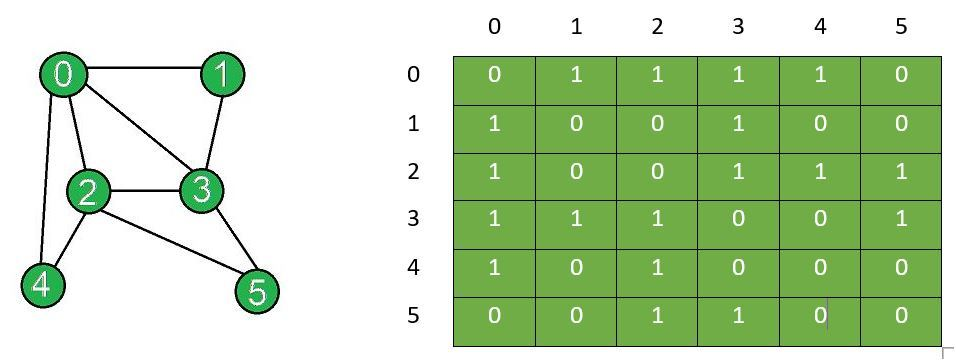

In [1]:
import sys
import os
import copy
import matplotlib.pyplot as plt
import logging
from IPython.core.display import Image, display
import networkx as nx
            
path = r'C:\Users\abhishek_sharma39\Documents\adjacency.jpg'
display(Image(filename = path, width=600, height=600));

In [20]:
class Node(object):
    
    def __init__(self, name):
        self.name = name
        self.adjacencyList = []
        self.visited = False

def breadthFirstSearch(startNode, endNode): # Total Time & Space Complexity -> O(V+E)
    if startNode == endNode:
        raise ValueError("Both the nodes are the same.")

    queue = [startNode] # FIFO # To fetch first item that was inserted
    sequence = [] # To print 

    while queue: # -> O(V) complexity # Runs till all vertices are exhausted
        currentNode = queue.pop(0) # Extracting the first of the adjacent items to be visited
        sequence.append(currentNode.name)
        currentNode.visited = True
        
        try:
            if endNode.name == currentNode.name:
                return sequence
                break
        except:
            pass

        for items in currentNode.adjacencyList: # -> O(E) # No. of edges top be traversed in Adjacency
            if not items.visited:
                queue.append(items) # Append unvisited neighbors to the queue
    
    return sequence

def depthFirstSearch(startNode, endNode):

    stack = [startNode] # LIFO # To fetch last item that was inserted -> O(1)
    sequence = [] # To print 

    while stack: # -> O(V) complexity # Runs till all vertices are exhausted
        # pop - O(1)
        currentNode = stack.pop() # Extracting the last of the adjacent items to be visited
        sequence.append(currentNode.name) # For printing to validate
        
        currentNode.visited = True # Once visited, mark it as True
        
        try:
            if endNode.name == currentNode.name:
                return sequence
                break
        except:
            pass
        
        for items in currentNode.adjacencyList: # -> O(E) # No. of edges to be traversed in Adjacency
            if not items.visited: # -> O(1)
                items.visited = True
                stack.append(items) # Append unvisited neighbors to the stack # -> O(1)
    
    return sequence
    
    
class Immunization:
    
    def __init__(self):
        
        """
        Constructor class to define object attributes.
        """
        
        vaccineList = [] # list containing vaccine and strains
        self.adjMatrixReshaped = None
        self.strains = [] # To store strains data from the input file
        self.vaccines = [] # To store vaccine list data from the input file
        self.graphList = [] # List of all nodes with their associations.
        
    def __str__(self):
        """
        To print attributes of a node
        """
        return f"Node {self.name} has {len(self.adjacencyList)} items"
    
    def __len__(self):
        """
        to return length of adjacency list associated with any individual node.
        """
        return len(self.adjacencyList)
    
    @staticmethod
    def createMatrix(rowCount, colCount, dataList):
        """
        Function to reshape the matrix
        input : 
        rowCount : counts of rows (int)
        colCount : counts of columns (int)
        dataList : data to be reshaped (list)
        
        return : reshaped list (rowCount objects each containing colCount values)
        
        """
        adjMatrixReshaped = []
        for i in range(rowCount):
            rowList = []
            for j in range(colCount):
                # Extract one row of data
                rowList.append(dataList[colCount * i + j])
            adjMatrixReshaped.append(rowList)

        return adjMatrixReshaped
    
    @staticmethod
    def zerosMatrix(rows, cols):
        """
        Creates a matrix filled with zeros.
            :param rows: the number of rows the matrix should have
            :param cols: the number of columns the matrix should have
            :return: list of lists that form the matrix
        """
        M = []
        while len(M) < rows:
            M.append([])
            while len(M[-1]) < cols:
                M[-1].append(0)

        return M


    def readInputfile(self, inputfile):
        """
        This function reads the input file inputPS16.txt 
        containing the name of the strains and associated vaccines in one line. 
        Input Format : The name of the vaccine and strain is separated by a slash.
        
        Ex. 229E / CoviShield / Covaxin / SputnikV / Pfizer
        
        Create relevant vertices for the strains and vaccines and relevant edges 
        to indicate the connection of a strain and its vaccines. 
        Ensure that none of the vaccines or strains get repeated 
        while creating the vertices of the graph.
        
        """

        self.inputFile = inputfile
    
        # Get the Strain/Vaccine segregated in requisite format
        for x in self.inputFile:
            x = x.split('/')
            self.strains.append(x[0].strip()) # Append has constant time complexity i.e.,O(1).
            vaccine = x[1:]
            
            strippedVaccine = [s.strip() for s in vaccine]
            self.vaccines.append(strippedVaccine)
            
        notUniqueVaccineList = []
        for item in self.vaccines:
            if item != None:
                for vacc in item: # Extract all items of the nested list
                    notUniqueVaccineList.append(vacc)
                    
        uniqueVaccineList = []
        for item in notUniqueVaccineList:
            if item not in uniqueVaccineList:
                uniqueVaccineList.append(item)
        self.uniqueVaccineList = uniqueVaccineList

        # Build nodes of strain & its associated vaccine.
        # Ensure that none of the vaccines or strains get repeated.
        
        uniqueStrain = []
        for s,v in zip(self.strains, self.vaccines):
            if s in uniqueStrain:
                raise ValueError("Repeated Strain")
            else:
                uniqueStrain.append(s)
                
        # Map vaccines with the strains
        # Assumption : A particular vaccine could neutralize only two strains at max. 
            
        for item in self.uniqueVaccineList: # traverses through unique values of vaccines
            vaccineStrainMap = []
            for s,v in zip(self.strains, self.vaccines):
                if item in v: # if unique value of vaccine 
                    vaccineStrainMap.append(s)
                    
            if len(vaccineStrainMap) > 2:
                print(vaccineStrainMap)
                raise ValueError("A vaccine can neutralise only 2 strains at max.")
        
        adjacencyMatrix = [] # Nested list of strains vs vaccines
        # O(S) # Where S is the np. of unique strains
        for rowIdx, strain in enumerate(self.strains): # Iterate through a strain at a time to build the adjacent matrix
            rowOfvaccines = self.vaccines[rowIdx] # One row of vaccine at a time # O(1)
            # O(V) # # V : No. of unique vaccines in the list
            for colIdx, vacc in enumerate(self.uniqueVaccineList): # Runs for the length of unique values
                if vacc not in rowOfvaccines:
                    adjacencyMatrix.append(0)
                else:
                    adjacencyMatrix.append(1)
        
        self.adjMatrixReshaped = Immunization.createMatrix(len(self.strains), 
                                                           len(self.uniqueVaccineList), 
                                                           adjacencyMatrix)
        
        
        # Build graph considering the constraints
        
        # Consider all S+V as nodes and determine their relationship
        
        totalElements = len(self.strains) + len(self.uniqueVaccineList)
        self.allNodes = self.strains + self.uniqueVaccineList
        graphAdjacency = Immunization.zerosMatrix(totalElements, totalElements) # To build adjacency list
        
        
        for strainIdx in range(len(self.strains)): # Building adjacency # O(S)
            # Take the mapping of first & then for others
            strainValue = self.strains[strainIdx]
            correspondingVaccines = self.vaccines[strainIdx]
            
            # Find index of vaccine present and map accordingly 
            if correspondingVaccines: # If the strain has an associated Vaccine List
                for vaccine in correspondingVaccines: # O(V)
                    vaccIndex = self.uniqueVaccineList.index(vaccine)
                    
                    graphAdjacency[strainIdx][len(self.strains) + vaccIndex] = 1 # (strainValue, vaccine)
                    graphAdjacency[len(self.strains) + vaccIndex][strainIdx] = 1 # (vaccine, strainValue)

        
        # Build nodes
        self.graphList = [] # Will contain the node objects with associations
        for nodeItem in self.strains + self.uniqueVaccineList:
            self.graphList.append(Node(nodeItem)) # O(1) : appending to existing list

        # Add adjacency Nodes 
        for rowIdx, nodeValue in enumerate(self.graphList):
            for colIdx in range(len(self.graphList)):
                if graphAdjacency[rowIdx][colIdx] == 1: # Association exists
                    nodeValue.adjacencyList.append(self.graphList[colIdx])
                            
            
    def displayAll(self): 
        """
        This function displays the total number (count) 
        of *unique vaccines and strains* entered through the input file. 
        It should also list out the unique vaccines and strains. 
        The output of this function should be pushed into outputPS16.txt file. 
        """
    
        print("--------Function displayAll--------")
        print("Total no. of strains: ", str(len(self.strains)))
        print("Total no. of vaccines: ", str(len(self.uniqueVaccineList)))

        print("\nList of strains:")
        for strain in self.strains:
            print(strain)

        print("\nList of vaccines:")
        for vaccine in self.uniqueVaccineList:
            print(vaccine)
        
        
    def displayStrains(self, vaccine): 
        """
        This function displays all the strains a particular vaccine is associated with. 
        The function reads the input strain name from the file promptsPS16.txt
        where the search id is mentioned with the tag as shown below.
        findStrain: CoviShield
        findStrain: Covaxin
        The output of this function should be appended into outputPS16.txt file. 
        If a strain is not found, an appropriate message should be output to the file.
        
        --------Function displayStrain --------
        Vaccine name: Covaxin
        List of Strains:
        P1
        B117 (if strain is not found display appropriate message)
        -----------------------------------------
        """
        
        print("\n--------Function displayStrain --------")
        
        print("Vaccine name: ",vaccine)
        print("List of Strains:")
        
        if vaccine in self.uniqueVaccineList:
            vaccIdx = self.uniqueVaccineList.index(vaccine) # O(n) : Traversing through the list 
            
            for idx, item in enumerate(self.adjMatrixReshaped):
                if item[vaccIdx] == 1:
                    print(self.strains[idx])
        
        else:
            print(f"No such vaccine record found for {vaccine}.")
        
        
    def displayVaccine(self, strain): 
        """
        This function displays all the vaccines associated with a strain. 
        The function reads the input strain name from the file promptsPS16.txt 
        where the search id is mentioned with the tag as shown below.
        listVaccine: P1
        listVaccine: B117
        The output of this function should be appended into outputPS16.txt file. 
        If a vaccine is not found, an appropriate message should be output to the file. 
        The output format should be as mentioned below.
        
        --------Function displayVaccine --------
        Strain name: P1
        List of Vaccines:
        Covaxin
        Pfizer
        CoviShield (if vaccine is not found, display appropriate message)
        -----------------------------------------
        """
        
        print("\n--------Function displayVaccine --------")
        
        print("Strain name: ", strain)
        print("List of Vaccines:")
        
        if strain in self.strains:
            strainIdx = self.strains.index(strain)
            for idx, item in enumerate(self.adjMatrixReshaped[strainIdx]):
                if item == 1:
                    print(self.uniqueVaccineList[idx])
        
        else:
            print(f"No such strain record found for {strain}.")

        
    def commonStrain(self, vacA, vacB):
        """
        Use one of the traversal techniques to find out 
        if two vaccine are related to each other through one common strain. 
        The function reads the input vaccine names from the file promptsPS16.txt 
        where the search id is mentioned with the tag as shown below.
        
        commonStrain: Covaxin : CoviShield
        The output of this function should be appended into outputPS16.txt file. 
        If a relation is not found, an appropriate message should be output to the file. 
        The output format should be as mentioned below.
        
        --------Function commonStrain --------
        Vaccine A: Covaxin
        Vaccine B: CoviShield
        common strain: Yes, B117 (if no, display appropriate message)
        -----------------------------------------
        """
        
        print("\n--------Function commonStrain --------")
        print("Vaccine A: ", vacA)
        print("Vaccine B: ", vacB)
        
        # To avoid node values being modified
        graphList = copy.deepcopy(self.graphList)
        allNodes = copy.deepcopy(self.allNodes)

        sequence = breadthFirstSearch(graphList[allNodes.index(vacA)], 
                                      graphList[allNodes.index(vacB)])
        
        
        try:  
            idxVacA = sequence.index(vacA)
            idxVacB = sequence.index(vacB)
            
            if len(sequence) > 1:
                print("Related: Yes, ", end = '')
                data = sequence[idxVacA + 1 : idxVacB]
                seq = [x for x in data if x not in self.uniqueVaccineList]
                for item in seq:
                    print(item, end = ' ')
            else: # No direct connection
                print("No relationship found!")
            
        except:
            print("No relationship found!")
        
        
    def findVaccineConnect(self, vacA, vacB): 
        """
        Use one of the traversal techniques to find out 
        if two vaccines A and B are related to each other 
        through a common vaccine C as defined in the question above. 
        The function reads the input vaccine names from the file promptsPS16.txt 
        where the search id is mentioned with the tag as shown below.
        
        vaccineConnect: Covaxin : Pfizer
        Display the entire relation that links vaccine A and vaccine B. 
        The output of this function should be appended into outputPS16.txt file. 
        If a relation is not found, an appropriate message should be output to the file. 
        The output format should be as mentioned below.
        
        --------Function findVaccineConnect --------
        Vaccine A: Covaxin
        Vaccine B: Pfizer
        Related: Yes, Covaxin > P1 > CoviShield > B117 > Pfizer
        (if no, display appropriate message)
        -----------------------------------------
        
        """
        
        print("\n--------Function findVaccineConnect --------")
        print("Vaccine A: ", vacA)
        print("Vaccine B: ", vacB)
        
        # To avoid node values being modified
        graphList = copy.deepcopy(self.graphList)
        allNodes = copy.deepcopy(self.allNodes)
        
        pathTraversal = depthFirstSearch(graphList[allNodes.index(vacA)], 
                                         graphList[allNodes.index(vacB)])
        
        if (pathTraversal[0] == vacA) & (pathTraversal[-1] == vacB):
        
            if len(pathTraversal) > 1:
                print("Related: Yes, ", end = '') 
                for nodeValue in pathTraversal[:-1]:
                    print(nodeValue, end = " > ")
                print(pathTraversal[-1])
        else:
            print("No relationship found!")



In [21]:
def readPrompt(path):
    
    print("\n--------Function fromPrompts --------")
    file = open(path, "r") # To be sent to the readInputfile
    
    functions = []
    paramList = []
    for x in file:
        x = x.split(':')
        functions.append(x[0].strip())
        params = x[1:]

        strippedParams = [s.strip() for s in params]
        paramList.append(strippedParams)
    
    return paramList[0][0], paramList[1][0], paramList[2][0], paramList[2][1], paramList[3][0], paramList[3][1] 

In [22]:
if __name__ == '__main__':
    
    cwd = os.getcwd()
    path = os.path.join(cwd, "inputPS16.txt")

    file = open(path, "r") # To be sent to the readInputfile
    
#     orig_stdout = sys.stdout
#     f = open('outputPS16.txt', 'w')
#     sys.stdout = f
    
    immunization = Immunization()
    immunization.readInputfile(file)
    immunization.displayAll()
    immunization.displayStrains('CoviShield')
    immunization.displayVaccine('B1351')
    
    immunization.findVaccineConnect('Covaxin', 'SputnikV')
    immunization.findVaccineConnect('Covaxin', 'CoviShield')
    immunization.commonStrain('Covaxin', 'CoviShield')
    immunization.commonStrain('CoronaVac', 'SputnikLight')
    
    promptsPath = os.path.join(cwd, "promptsPS16.txt")
    displayStrainsVal, listVaccineVal, commonStrainVacA, commonStrainVacB,  findVaccineConnectVacA, findVaccineConnectVacB = readPrompt(promptsPath)
    

    immunization.displayStrains(displayStrainsVal)
    immunization.displayVaccine(listVaccineVal)
    immunization.commonStrain(commonStrainVacA, commonStrainVacB)
    immunization.findVaccineConnect(findVaccineConnectVacA, findVaccineConnectVacB)
    
#     sys.stdout = orig_stdout
#     f.close()
    
    

--------Function displayAll--------
Total no. of strains:  7
Total no. of vaccines:  9

List of strains:
229E
B1351
P1
B117
B1617
L452R
B.1.351

List of vaccines:
CoviShield
Covaxin
SputnikV
Moderna
J&J
SputnikLight
Pfizer
CoronaVac
Oxford-AstraZeneca

--------Function displayStrain --------
Vaccine name:  CoviShield
List of Strains:
229E
P1

--------Function displayVaccine --------
Strain name:  B1351
List of Vaccines:
SputnikV
Moderna

--------Function findVaccineConnect --------
Vaccine A:  Covaxin
Vaccine B:  SputnikV
Related: Yes, Covaxin > 229E > CoviShield > P1 > SputnikV

--------Function findVaccineConnect --------
Vaccine A:  Covaxin
Vaccine B:  CoviShield
Related: Yes, Covaxin > 229E > CoviShield

--------Function commonStrain --------
Vaccine A:  Covaxin
Vaccine B:  CoviShield
Related: Yes, 229E, 
--------Function commonStrain --------
Vaccine A:  CoronaVac
Vaccine B:  SputnikLight
Related: Yes, B1617, L452R, 
--------Function fromPrompts --------

--------Function displayS

Instructions
1. It is compulsory to make use of the data structure(s) / algorithms mentioned in the problem statement.
2. Ensure that all data structure insert and delete operations throw appropriate messages when their capacity is empty or full. Also ensure basic error handling is implemented.
3. For the purposes of testing, you may implement some functions to print the data structures or other test data. But all such functions must be commented before submission.
4. Make sure that your read, understand, and follow all the instructions
5. Ensure that the input, prompt and output file guidelines are adhered to. Deviations from the mentioned formats will not be entertained.
6. The input, prompt and output samples shown here are only a representation of the syntax to be used. Actual files used to evaluate the submissions will be different. Hence, do not hard code any values into the code.
7. Run time analysis is to be provided in asymptotic notations and not timestamp based runtimes in sec or milliseconds.
8. Please note that the design document must include
a. The data structure model you chose with justifications
b. Details of each operations with the time complexity and reasons why the chosen operations are efficient for the given representation
c. One alternate way of modelling the problem with the cost implications.
9. Writing good technical report and well document code is an art. Your report cannot exceed 4 pages. Your code must be modular and quite well documented.

Instructions for use of Python:
1. Implement the above problem statement using Python 3.7.
2. Use only native data types like lists and tuples in Python, do not use dictionaries provided in Python. Use of external libraries like graph, numpy, pandas library etc. is not allowed. The purpose of the assignment is for you to learn how these data structures are constructed and how they work internally.
3. Create a single *.py file for code. Do not fragment your code into multiple files.
4. Do not submit a Jupyter Notebook (no *.ipynb). These submissions will not be evaluated.
5. Read the input file and create the output file in the root folder itself along with your .py file. Do not create separate folders for input and output files.